In [1]:
import glob, os
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
def get_precision_recall(A, B):

    retrieved_list = A['opcs'].drop_duplicates()
    target_list = B['code'].str.replace('.','').drop_duplicates()
    
    total_codes_retrieved = len(retrieved_list)
    target_codes_retrieved = sum(retrieved_list.isin(target_list))
    total_target_codes = len(target_list)
    

    # precision = relevant retrieved instances / all retrieved instances
    # 'how many of the retrieved codes were in CORECT-R'
    precision = ( target_codes_retrieved / total_codes_retrieved ) * 100
    print('   Precision: ',round(precision,2), '  ',target_codes_retrieved,' out of ',total_codes_retrieved,'codes retrieved were relevant')

    # recall = relevant retrieved instances / all relevant instances
    # 'how many of the CORECT-R codes were retrieved?'
    recall = ( target_codes_retrieved / total_target_codes ) * 100
    print('   Recall:    ',round(recall,2), '  ',target_codes_retrieved,' out of ',total_target_codes,' CORECT codes found')

    return precision, recall

In [3]:
# Get codelists to compare against
comparison_sets = [['appendix', 'hdruk/Appendicitis'], 
                   ['cataract', 'hdruk/Cataract'], 
                   #['divert', 'hdruk/Diverticular_disease_of_intestine'], 
                   ['glaucoma', 'hdruk/Glaucoma']]
recall_matrix    = pd.DataFrame(index=[i[0] for i in comparison_sets], columns = range(0,8))
precision_matrix = pd.DataFrame(index=[i[0] for i in comparison_sets], columns = range(0,8))


In [4]:
os.getcwd()

'/Users/oweyer/Documents/ontologyFilter/src'

In [5]:


# Get source codelists

for s in comparison_sets:
    print('--- Comparing '+s[0]+' codelist against '+s[1]+' standard')
    files = sorted( list( glob.glob("codelists/output/query_"+s[0]+"*_opcs.csv") ) )
    print(files)

    try:
        benchmark_list = pd.read_csv('codelists/'+s[1]+".csv")

        i=0
        for f in files: 
            print(f)
            codelist = pd.read_csv(f)
            p, r = get_precision_recall(codelist, benchmark_list)

            precision_matrix.loc[s[0]][i] = round(p,2)
            recall_matrix.loc[s[0]][i] = round(r,2)

            i = i + 1

    except FileNotFoundError as e:
        print(e)
# Create matrix

--- Comparing appendix codelist against hdruk/Appendicitis standard
['codelists/output/query_appendix_0_opcs.csv', 'codelists/output/query_appendix_1_opcs.csv', 'codelists/output/query_appendix_2_opcs.csv', 'codelists/output/query_appendix_3_opcs.csv', 'codelists/output/query_appendix_4_opcs.csv', 'codelists/output/query_appendix_5_opcs.csv', 'codelists/output/query_appendix_6_opcs.csv', 'codelists/output/query_appendix_7_opcs.csv']
codelists/output/query_appendix_0_opcs.csv
   Precision:  4.1    11  out of  268 codes retrieved were relevant
   Recall:     78.57    11  out of  14  CORECT codes found
codelists/output/query_appendix_1_opcs.csv
   Precision:  22.0    11  out of  50 codes retrieved were relevant
   Recall:     78.57    11  out of  14  CORECT codes found
codelists/output/query_appendix_2_opcs.csv
   Precision:  5.12    11  out of  215 codes retrieved were relevant
   Recall:     78.57    11  out of  14  CORECT codes found
codelists/output/query_appendix_3_opcs.csv
   Precis

In [6]:
display(precision_matrix)
display(recall_matrix)

,0,1,2,3,4,5,6,7
appendix,4.1,22.0,5.12,22.92,22.0,22.0,22.92,22.92
cataract,0.42,62.79,0.46,64.29,62.79,71.05,64.29,72.22
glaucoma,0.37,4.55,0.42,4.77,4.55,0.0,4.77,0.0


,0,1,2,3,4,5,6,7
appendix,78.57,78.57,78.57,78.57,78.57,78.57,78.57,78.57
cataract,84.38,84.38,84.38,84.38,84.38,84.38,84.38,81.25
glaucoma,90.48,90.48,90.48,90.48,90.48,0.0,90.48,0.0


<Axes: >

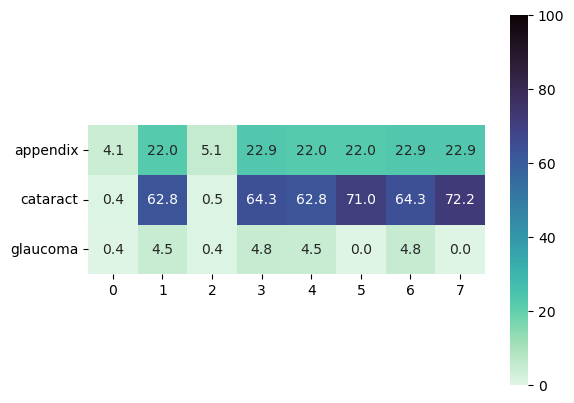

In [7]:
display( sns.heatmap(data=precision_matrix.astype(float), vmin=0, vmax=100, cmap='mako_r', square=True, annot=True, fmt=".1f") )

<Axes: >

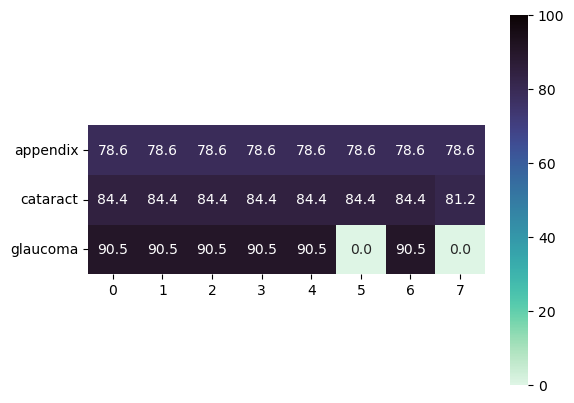

In [8]:
display( sns.heatmap(data=recall_matrix.astype(float), vmin=0, vmax=100, cmap='mako_r', square=True, annot=True, fmt=".1f") )